In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [34]:
# parameters in the model
beta=0.95 # discount factor (annual model)
gamma=3 # CRRA parameter in utility function
alp=0.35 # capital share in production function
de=0.05 # depreciation rate of capital

# utility function
u=lambda c: np.power(c,1-gamma)/(1-gamma)

# production function
f=lambda k: np.power(k,alp)

# inverse of f', used to calculate steady state capital kMax
fp_inv=lambda fp: np.power(alp/fp,1/(1-alp))

In [74]:
# create grid of capital
kMin=0
kMax=fp_inv(1/beta-1+de)*1.2 # steady state capital increated by 20%
kN=300
k1=np.linspace(kMin,kMax,num=kN) # grid of capital today

kp1=k1 # grid of capital next period

# create joint grid of state k and control kp
k2,kp2=np.meshgrid(k1,kp1,indexing='ij')
c2=f(k2)+(1-de)*k2-kp2 # consumption implied by k and kp

# initial guess of value function 
v1=np.zeros(kN)


In [75]:
# value function interation
di=1e3
tol=1e-5
iter=1
iterMax=1e3

while (iter<iterMax) and (di>tol):
    iter=iter+1
    
    fun_vcont=interpolate.interp1d(k1,v1)
    v2=u(c2)+beta*fun_vcont(kp2)
    v2[c2<=0]=-1e10 # if consumption is negative, set value to some very negative number
    
    v1_update=np.amax(v2,axis=1) # choose the maximum along the kp dimension
    idx1=np.argmax(v2,axis=1)
    
    di=max(abs(v1-v1_update))
    display('diff=',di,' ,','iter=',iter)
    
    v1=v1_update


<ipython-input-34-3efbd6442d91>:8: RuntimeWarning: divide by zero encountered in power
  u=lambda c: np.power(c,1-gamma)/(1-gamma)


'diff='

10000000000.0

' ,'

'iter='

2

'diff='

5.330177161046716

' ,'

'iter='

3

'diff='

3.4449654585357443

' ,'

'iter='

4

'diff='

2.4333105844235554

' ,'

'iter='

5

'diff='

1.577298586328535

' ,'

'iter='

6

'diff='

1.256669838967106

' ,'

'iter='

7

'diff='

0.938452760994636

' ,'

'iter='

8

'diff='

0.7817139682713403

' ,'

'iter='

9

'diff='

0.6671727593727823

' ,'

'iter='

10

'diff='

0.5489100118856243

' ,'

'iter='

11

'diff='

0.4766239433316528

' ,'

'iter='

12

'diff='

0.4170503229134468

' ,'

'iter='

13

'diff='

0.3690533440665291

' ,'

'iter='

14

'diff='

0.32337804252261293

' ,'

'iter='

15

'diff='

0.2857902711611402

' ,'

'iter='

16

'diff='

0.25850845424778157

' ,'

'iter='

17

'diff='

0.23415794934072665

' ,'

'iter='

18

'diff='

0.2124247051231407

' ,'

'iter='

19

'diff='

0.19271517806592442

' ,'

'iter='

20

'diff='

0.17487033156260878

' ,'

'iter='

21

'diff='

0.1597676105503183

' ,'

'iter='

22

'diff='

0.14726038821746812

' ,'

'iter='

23

'diff='

0.13526020917552728

' ,'

'iter='

24

'diff='

0.12522634975492153

' ,'

'iter='

25

'diff='

0.1158091336388658

' ,'

'iter='

26

'diff='

0.10694878594450685

' ,'

'iter='

27

'diff='

0.09929389310369174

' ,'

'iter='

28

'diff='

0.09248551505495328

' ,'

'iter='

29

'diff='

0.08579405485912162

' ,'

'iter='

30

'diff='

0.08034810311274398

' ,'

'iter='

31

'diff='

0.07469643660428105

' ,'

'iter='

32

'diff='

0.06951301485594641

' ,'

'iter='

33

'diff='

0.06506500525545533

' ,'

'iter='

34

'diff='

0.0606708650309713

' ,'

'iter='

35

'diff='

0.05689896962907781

' ,'

'iter='

36

'diff='

0.05344454427410383

' ,'

'iter='

37

'diff='

0.05005354706788623

' ,'

'iter='

38

'diff='

0.046918287152674765

' ,'

'iter='

39

'diff='

0.04423630221790731

' ,'

'iter='

40

'diff='

0.04153623200906509

' ,'

'iter='

41

'diff='

0.03904669024048246

' ,'

'iter='

42

'diff='

0.036742245109596894

' ,'

'iter='

43

'diff='

0.034653004435945434

' ,'

'iter='

44

'diff='

0.0326161432354084

' ,'

'iter='

45

'diff='

0.030782756335746342

' ,'

'iter='

46

'diff='

0.02898807916468371

' ,'

'iter='

47

'diff='

0.027341639545380048

' ,'

'iter='

48

'diff='

0.025839360618416407

' ,'

'iter='

49

'diff='

0.024373320210141713

' ,'

'iter='

50

'diff='

0.023011874312288683

' ,'

'iter='

51

'diff='

0.021756180252999968

' ,'

'iter='

52

'diff='

0.020535927236732476

' ,'

'iter='

53

'diff='

0.019449168116558724

' ,'

'iter='

54

'diff='

0.01837377114914318

' ,'

'iter='

55

'diff='

0.017368687331714483

' ,'

'iter='

56

'diff='

0.016437282391301267

' ,'

'iter='

57

'diff='

0.01556204194067945

' ,'

'iter='

58

'diff='

0.014704564678677201

' ,'

'iter='

59

'diff='

0.013915937248665244

' ,'

'iter='

60

'diff='

0.013173912865841686

' ,'

'iter='

61

'diff='

0.012486783018704983

' ,'

'iter='

62

'diff='

0.011818808925589508

' ,'

'iter='

63

'diff='

0.011194928469059562

' ,'

'iter='

64

'diff='

0.010610524180357572

' ,'

'iter='

65

'diff='

0.010053585830608114

' ,'

'iter='

66

'diff='

0.009530754693905408

' ,'

'iter='

67

'diff='

0.009035726653635834

' ,'

'iter='

68

'diff='

0.008551732098990072

' ,'

'iter='

69

'diff='

0.008110310348694583

' ,'

'iter='

70

'diff='

0.007687681067189089

' ,'

'iter='

71

'diff='

0.007289488277368861

' ,'

'iter='

72

'diff='

0.00691365206336414

' ,'

'iter='

73

'diff='

0.006553373858054101

' ,'

'iter='

74

'diff='

0.006216634814435906

' ,'

'iter='

75

'diff='

0.00589617870403103

' ,'

'iter='

76

'diff='

0.005593582477018799

' ,'

'iter='

77

'diff='

0.005306372203474297

' ,'

'iter='

78

'diff='

0.005032855375766587

' ,'

'iter='

79

'diff='

0.004777552967905052

' ,'

'iter='

80

'diff='

0.004530896768102366

' ,'

'iter='

81

'diff='

0.004300307700251693

' ,'

'iter='

82

'diff='

0.004079522909318456

' ,'

'iter='

83

'diff='

0.003873549472029225

' ,'

'iter='

84

'diff='

0.0036755165984807547

' ,'

'iter='

85

'diff='

0.0034857860783965577

' ,'

'iter='

86

'diff='

0.003309844678643259

' ,'

'iter='

87

'diff='

0.003142046966054579

' ,'

'iter='

88

'diff='

0.0029832528733422237

' ,'

'iter='

89

'diff='

0.0028305600409304077

' ,'

'iter='

90

'diff='

0.002688159631826892

' ,'

'iter='

91

'diff='

0.002551881134692735

' ,'

'iter='

92

'diff='

0.0024229998710580958

' ,'

'iter='

93

'diff='

0.0022993066549403807

' ,'

'iter='

94

'diff='

0.0021834643742266735

' ,'

'iter='

95

'diff='

0.002073375061524274

' ,'

'iter='

96

'diff='

0.0019686661270625905

' ,'

'iter='

97

'diff='

0.0018695681284270904

' ,'

'iter='

98

'diff='

0.001774542719790162

' ,'

'iter='

99

'diff='

0.0016849033106680622

' ,'

'iter='

100

'diff='

0.0016003483236417537

' ,'

'iter='

101

'diff='

0.0015195205511773224

' ,'

'iter='

102

'diff='

0.0014425526021888402

' ,'

'iter='

103

'diff='

0.0013698594328204194

' ,'

'iter='

104

'diff='

0.0013010056498181655

' ,'

'iter='

105

'diff='

0.001235816876363316

' ,'

'iter='

106

'diff='

0.0011733783317886548

' ,'

'iter='

107

'diff='

0.0011146051987545036

' ,'

'iter='

108

'diff='

0.0010583016499410292

' ,'

'iter='

109

'diff='

0.0010053865674386486

' ,'

'iter='

110

'diff='

0.0009546597171770088

' ,'

'iter='

111

'diff='

0.000906805700214619

' ,'

'iter='

112

'diff='

0.0008614641829680636

' ,'

'iter='

113

'diff='

0.0008179036278193053

' ,'

'iter='

114

'diff='

0.0007770084464198135

' ,'

'iter='

115

'diff='

0.0007379140944081541

' ,'

'iter='

116

'diff='

0.0007008554398630906

' ,'

'iter='

117

'diff='

0.0006658126678651399

' ,'

'iter='

118

'diff='

0.0006323667427565738

' ,'

'iter='

119

'diff='

0.000600570890920693

' ,'

'iter='

120

'diff='

0.0005705423463737702

' ,'

'iter='

121

'diff='

0.0005417630232003035

' ,'

'iter='

122

'diff='

0.0005146473561232767

' ,'

'iter='

123

'diff='

0.0004889149883169353

' ,'

'iter='

124

'diff='

0.0004644692388957594

' ,'

'iter='

125

'diff='

0.00044104292992486194

' ,'

'iter='

126

'diff='

0.00041897766226739463

' ,'

'iter='

127

'diff='

0.0003980287791520709

' ,'

'iter='

128

'diff='

0.00037812734019482264

' ,'

'iter='

129

'diff='

0.0003592209731806406

' ,'

'iter='

130

'diff='

0.0003411463328326647

' ,'

'iter='

131

'diff='

0.00032404415529185826

' ,'

'iter='

132

'diff='

0.0003078419475279759

' ,'

'iter='

133

'diff='

0.00029244985015175473

' ,'

'iter='

134

'diff='

0.00027782735764247946

' ,'

'iter='

135

'diff='

0.00026393598975715804

' ,'

'iter='

136

'diff='

0.0002507391902675238

' ,'

'iter='

137

'diff='

0.00023813615104018027

' ,'

'iter='

138

'diff='

0.00022618873142477014

' ,'

'iter='

139

'diff='

0.000214879294855308

' ,'

'iter='

140

'diff='

0.0002041353301116544

' ,'

'iter='

141

'diff='

0.0001939285636041177

' ,'

'iter='

142

'diff='

0.00018423213542462236

' ,'

'iter='

143

'diff='

0.00017502052865481232

' ,'

'iter='

144

'diff='

0.00016626950221976244

' ,'

'iter='

145

'diff='

0.0001579560271096625

' ,'

'iter='

146

'diff='

0.00015004849212374438

' ,'

'iter='

147

'diff='

0.00014249558268630835

' ,'

'iter='

148

'diff='

0.00013537080355341402

' ,'

'iter='

149

'diff='

0.0001286022633761874

' ,'

'iter='

150

'diff='

0.00012217215020804417

' ,'

'iter='

151

'diff='

0.00011606354269755315

' ,'

'iter='

152

'diff='

0.00011026036556227581

' ,'

'iter='

153

'diff='

0.00010474734728393997

' ,'

'iter='

154

'diff='

9.950997992014265e-05

' ,'

'iter='

155

'diff='

9.45344809260007e-05

' ,'

'iter='

156

'diff='

8.980775687916775e-05

' ,'

'iter='

157

'diff='

8.531736903627518e-05

' ,'

'iter='

158

'diff='

8.105150058312915e-05

' ,'

'iter='

159

'diff='

7.699892555379506e-05

' ,'

'iter='

160

'diff='

7.31489792755724e-05

' ,'

'iter='

161

'diff='

6.949153031143851e-05

' ,'

'iter='

162

'diff='

6.601695379515604e-05

' ,'

'iter='

163

'diff='

6.271610610752987e-05

' ,'

'iter='

164

'diff='

5.958030080321919e-05

' ,'

'iter='

165

'diff='

5.6601285763235865e-05

' ,'

'iter='

166

'diff='

5.37712214772057e-05

' ,'

'iter='

167

'diff='

5.108266040565468e-05

' ,'

'iter='

168

'diff='

4.8520473960422805e-05

' ,'

'iter='

169

'diff='

4.608390364602144e-05

' ,'

'iter='

170

'diff='

4.3779708464697364e-05

' ,'

'iter='

171

'diff='

4.159072303977496e-05

' ,'

'iter='

172

'diff='

3.951118688938493e-05

' ,'

'iter='

173

'diff='

3.7535627544826866e-05

' ,'

'iter='

174

'diff='

3.5658846169184244e-05

' ,'

'iter='

175

'diff='

3.387590386338957e-05

' ,'

'iter='

176

'diff='

3.218210867217408e-05

' ,'

'iter='

177

'diff='

3.057300323305867e-05

' ,'

'iter='

178

'diff='

2.9044353073715e-05

' ,'

'iter='

179

'diff='

2.759213542091743e-05

' ,'

'iter='

180

'diff='

2.6212528652536093e-05

' ,'

'iter='

181

'diff='

2.4901902215823668e-05

' ,'

'iter='

182

'diff='

2.365680710525453e-05

' ,'

'iter='

183

'diff='

2.2473966749814167e-05

' ,'

'iter='

184

'diff='

2.1350268413655726e-05

' ,'

'iter='

185

'diff='

2.0282754991995944e-05

' ,'

'iter='

186

'diff='

1.9268617243994868e-05

' ,'

'iter='

187

'diff='

1.8305186380018768e-05

' ,'

'iter='

188

'diff='

1.7389927062794186e-05

' ,'

'iter='

189

'diff='

1.6520430708766298e-05

' ,'

'iter='

190

'diff='

1.5694409173150348e-05

' ,'

'iter='

191

'diff='

1.4909688715647462e-05

' ,'

'iter='

192

'diff='

1.4164204280575632e-05

' ,'

'iter='

193

'diff='

1.3455994068323207e-05

' ,'

'iter='

194

'diff='

1.278319436437414e-05

' ,'

'iter='

195

'diff='

1.214403464544489e-05

' ,'

'iter='

196

'diff='

1.1536832914771367e-05

' ,'

'iter='

197

'diff='

1.0959991268322256e-05

' ,'

'iter='

198

'diff='

1.0411991704373236e-05

' ,'

'iter='

199

'diff='

9.891392118710485e-06

' ,'

'iter='

200

In [76]:
# calculate policy functions
p={} # use dictionary p to store policy functions
p['kp1']=kp2[np.arange(kN),idx1] # policy function for capital next period
p['c1']=c2[np.arange(kN),idx1] # policy function for consumption

Text(0.5, 1.0, 'c')

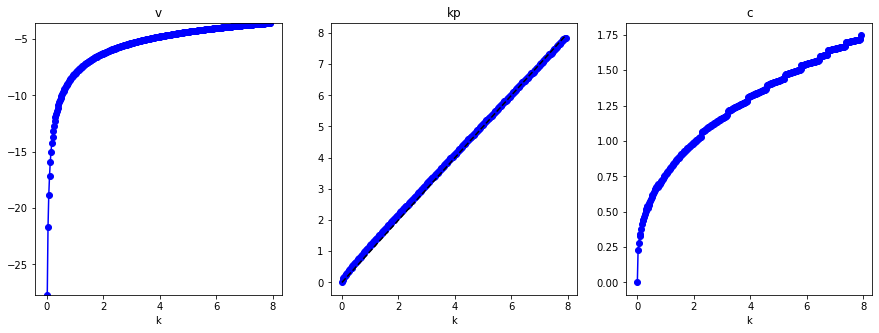

In [78]:
# plot the results

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(k1,v1,'bo-')
plt.xlabel('k')
plt.title('v')
plt.ylim(min(v1[v1>-1e5]),max(v1[v1>-1e5]))

plt.subplot(1,3,2)
plt.plot(k1,p['kp1'],'bo-',k1,k1,'k--')
plt.xlabel('k')
plt.title('kp')

plt.subplot(1,3,3)
plt.plot(k1,p['c1'],'bo-')
plt.xlabel('k')
plt.title('c')